#### 비트 코인과 금 : 경제적 불확실성 시기에 안전자산으로서의 역할과 대체 가능성 분석

- 금 가격과 비트코인 변동성 비교 / 경제 위기의 기간 동안의 트랜드 분석

In [88]:
# !pip install kagglehub

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:/Windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

##### 데이터 로드

In [109]:
gold_path = kagglehub.dataset_download("farzadnekouei/gold-price-10-years-20132023")
print("Path to dataset files:", gold_path)

btc_path = kagglehub.dataset_download("prasoonkottarathil/btcinusd")
print("Path to dataset files:", btc_path)

gold_data = pd.read_csv('./data/Gold Price (2013-2023).csv')
btc_daily = pd.read_csv('./data/BTC-Daily.csv')


Path to dataset files: C:\Users\Playdata\.cache\kagglehub\datasets\farzadnekouei\gold-price-10-years-20132023\versions\1
Path to dataset files: C:\Users\Playdata\.cache\kagglehub\datasets\prasoonkottarathil\btcinusd\versions\4


##### 데이터 구조 및 기초 통계 확인

In [110]:
gold_data.info()
gold_data.describe()
gold_data.columns = gold_data.columns.str.lower()
gold_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


,date,price,open,high,low,vol.,change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [111]:
btc_daily.info()
btc_daily.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


##### 데이터 전처리

In [112]:
# 날짜 타입 변경
btc_daily['date'] = pd.to_datetime(btc_daily['date'])
gold_data['date'] = pd.to_datetime(gold_data['date'])

In [113]:
def clean_and_convert(df):
    for col in ['price', 'open', 'high', 'low', 'vol.', 'change %']:

        # Object 타입을 각각의 맞는 타입으로 변경
        if df[col].dtype == 'O':

            # 숫자와 문자로 이루어져 있어 해당 데이터를 숫자로 변경하기 위한 작업
            if col == 'vol.':
                df[col] = df[col].replace({'K': '*1e3', 'M': '*1e6'}, regex=True)
                df[col] = df[col].apply(lambda x: eval(str(x)) if isinstance(x, str) else x)
            
            elif col == 'change %':
                df[col] = df[col].str.replace('%', '', regex=True) 
                
            df[col] = df[col].str.replace(',', '', regex=True) 
        
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [115]:
gold_data = clean_and_convert(gold_data)

In [120]:
btc_daily['price'] = (btc_daily['high'] + btc_daily['low']) / 2

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,price
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06,43405.985
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08,40862.535
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07,38451.330
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07,39465.495
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07,38877.790
...,...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03,379.045
2647,1417392000,2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03,377.670
2648,1417305600,2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03,377.655
2649,1417219200,2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03,379.425


In [128]:
# 두 데이터 공통 기간 필터링
common_start_date = max(gold_data['date'].min(), btc_daily['date'].min())
common_end_date = min(gold_data['date'].max(), btc_daily['date'].max())

gold_common = gold_data[(gold_data['date'] >= common_start_date) & (gold_data['date'] <= common_end_date)]
btc_common = btc_daily[(btc_daily['date'] >= common_start_date) & (btc_daily['date'] <= common_end_date)]

### 데이터 탐색

- 기간별 가격 분포와 이상치를 확인하기 위한 그래프

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5188\1092747108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_common['year'] = gold_common['date'].dt.year


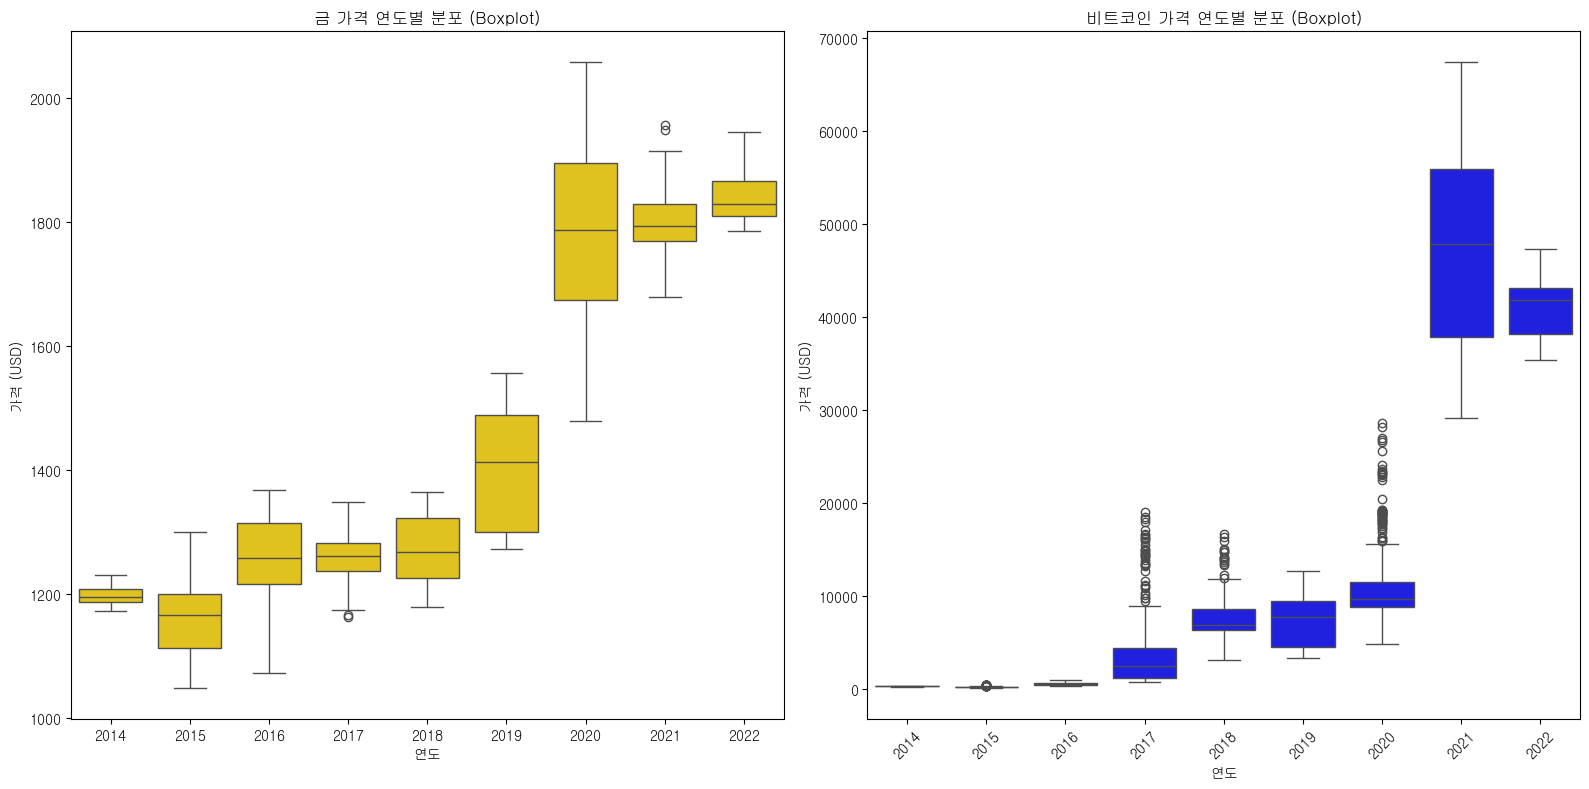

In [155]:
gold_common['year'] = gold_common['date'].dt.year
btc_common['year'] = btc_common['date'].dt.year

# 상자 그림 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(data=gold_common, x='year', y='price', ax=axes[0], color='gold')
axes[0].set_title('금 가격 연도별 분포 (Boxplot)')
axes[0].set_xlabel('연도')
axes[0].set_ylabel('가격 (USD)')

sns.boxplot(data=btc_common, x='year', y='price', ax=axes[1], color='blue')
axes[1].set_title('비트코인 가격 연도별 분포 (Boxplot)')
axes[1].set_xlabel('연도')
axes[1].set_ylabel('가격 (USD)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 두 자산 간 상관관계 확인하기 위한 산점도

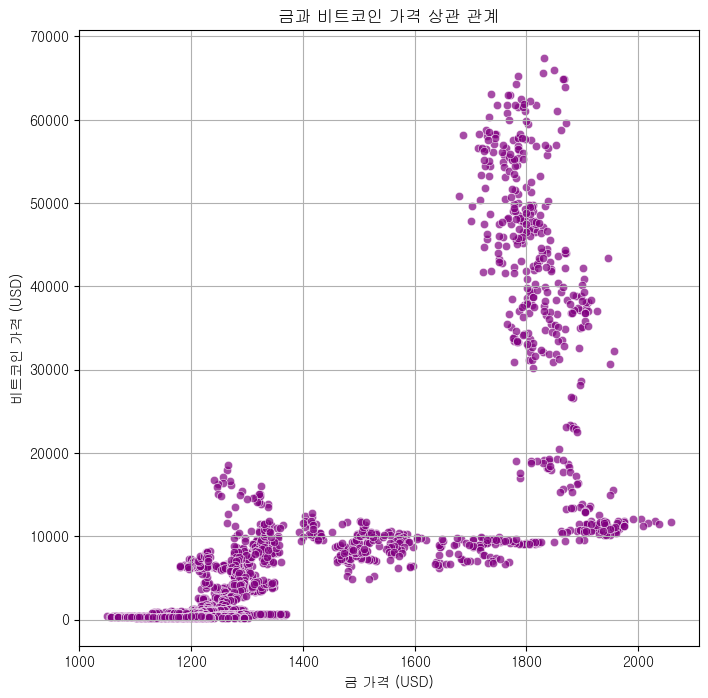

In [157]:
# 공통 날짜 기준 데이터 결합
merged_data = pd.merge(gold_common[['date', 'price']], btc_common[['date', 'price']], on='date', suffixes=('_gold', '_btc'))

# 산점도 시각화
plt.figure(figsize=(8, 8))
sns.scatterplot(data=merged_data, x='price_gold', y='price_btc', alpha=0.7, color='purple')
plt.title('금과 비트코인 가격 상관 관계')
plt.xlabel('금 가격 (USD)')
plt.ylabel('비트코인 가격 (USD)')
plt.grid(True)
plt.show()

##### 데이터 시각화를 통한 탐색

- 금과 비트코인의 가격 변동성을 비교

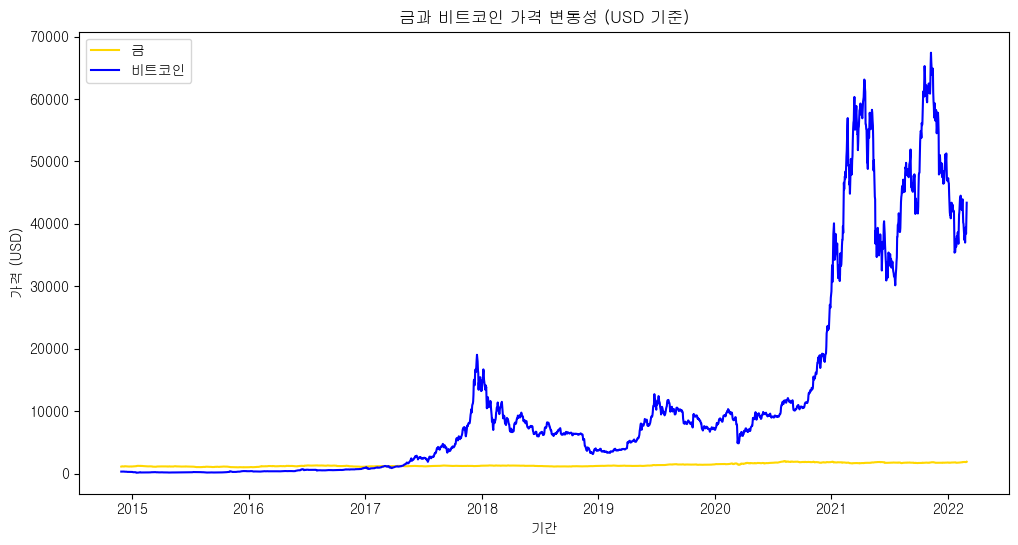

In [134]:
plt.figure(figsize=(12, 6))
plt.plot(gold_common['date'], gold_common['price'], label='금', color='gold')
plt.plot(btc_common['date'], btc_common['price'], label='비트코인', color='blue')
plt.legend()
plt.title('금과 비트코인 가격 변동성 (USD 기준)')
plt.xlabel('기간')
plt.ylabel('가격 (USD)')
plt.show()

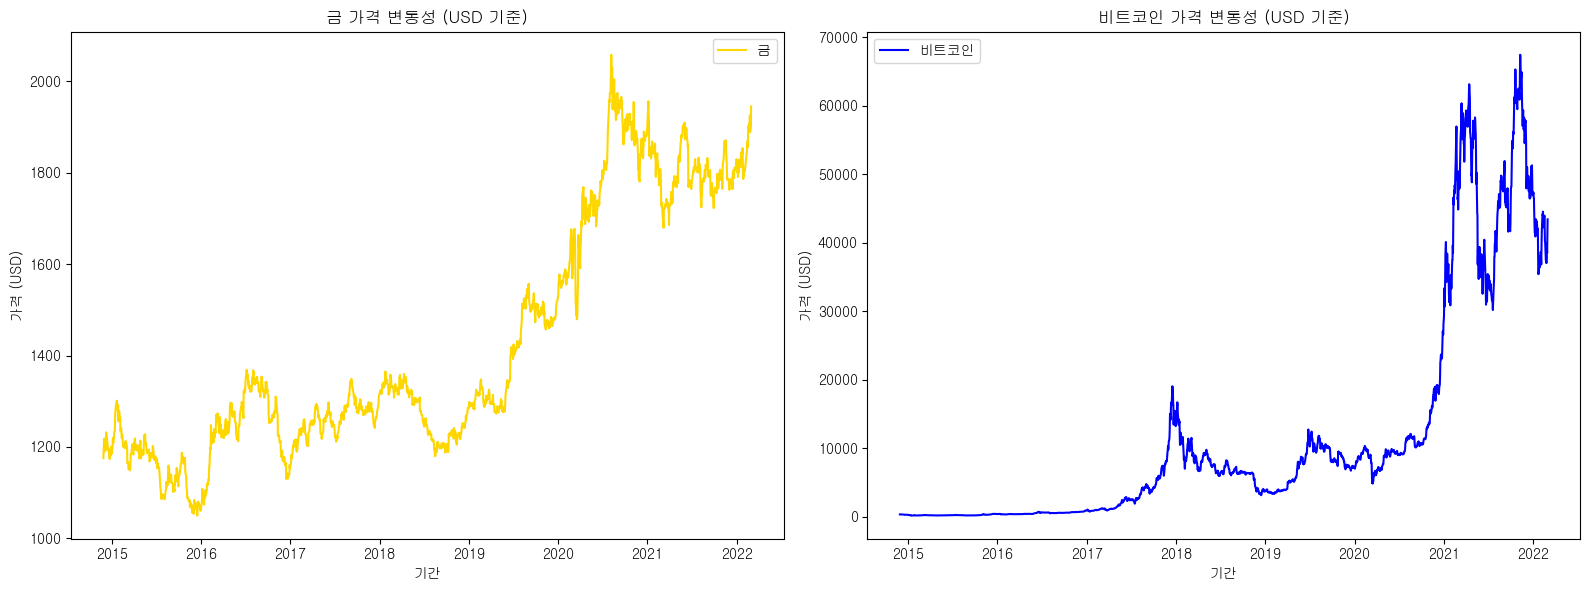

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(gold_common['date'], gold_common['price'], label='금', color='gold')
axes[0].set_title('금 가격 변동성 (USD 기준)')
axes[0].set_xlabel('기간')
axes[0].set_ylabel('가격 (USD)')
axes[0].legend()

axes[1].plot(btc_common['date'], btc_common['price'], label='비트코인', color='blue')
axes[1].set_title('비트코인 가격 변동성 (USD 기준)')
axes[1].set_xlabel('기간')
axes[1].set_ylabel('가격 (USD)')
axes[1].legend()

plt.tight_layout()
plt.show()

- 정규화를 통한 가격 변동성 비교 (가격 기준이 다르기 때문에 가격 기준을 정규화로 맞춤)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5188\3695833477.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_common['price_normalized'] = normalize_series(gold_common['price'])


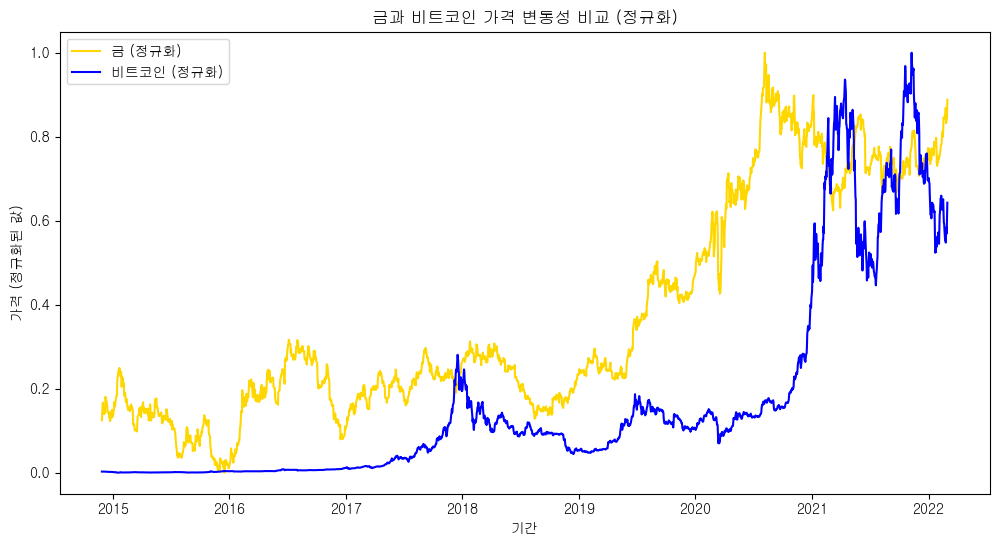

In [140]:
def normalize_series(series):
    return (series - series.min()) / (series.max() - series.min())

# 금과 비트코인 가격 정규화
gold_common['price_normalized'] = normalize_series(gold_common['price'])
btc_common['price_normalized'] = normalize_series(btc_common['price'])

# 정규화된 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(gold_common['date'], gold_common['price_normalized'], label='금 (정규화)', color='gold')
plt.plot(btc_common['date'], btc_common['price_normalized'], label='비트코인 (정규화)', color='blue')
plt.legend()
plt.title('금과 비트코인 가격 변동성 비교 (정규화)')
plt.xlabel('기간')
plt.ylabel('가격 (정규화된 값)')
plt.show()

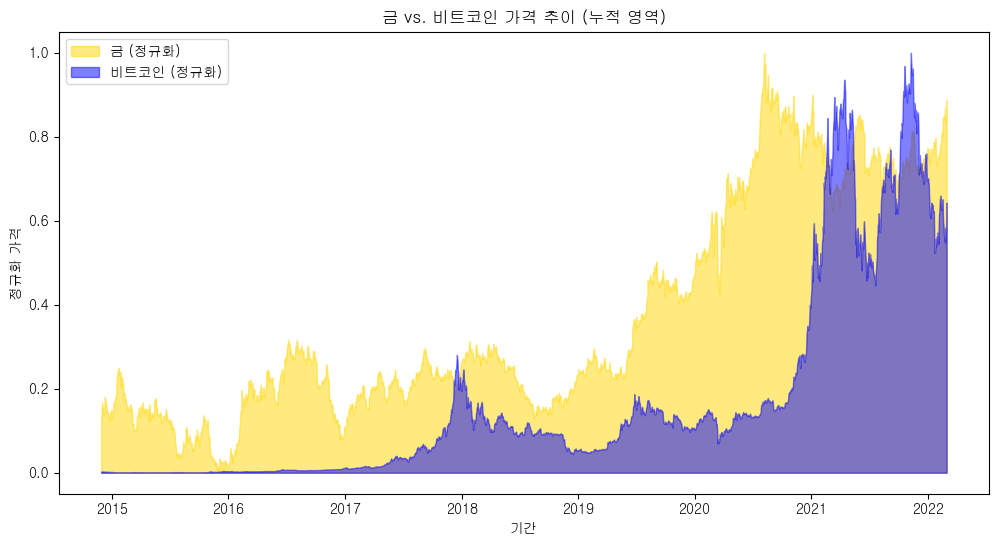

In [159]:
# 누적 영역 그래프
plt.figure(figsize=(12, 6))
plt.fill_between(gold_common['date'], gold_common['price_normalized'], label='금 (정규화)', color='gold', alpha=0.5)
plt.fill_between(btc_common['date'], btc_common['price_normalized'], label='비트코인 (정규화)', color='blue', alpha=0.5)
plt.title('금 vs. 비트코인 가격 추이 (누적 영역)')
plt.xlabel('기간')
plt.ylabel('정규화 가격')
plt.legend()
plt.show()

- 시간에 따른 가격 변동 강도를 표현하기 위해 월별 평균을 통해 히트맵으로 분석
    - 시즌별 가격 패턴을 확인하기 위해 특정 열에 급등, 급락하는 경향을 분석하여 계절적 요소와 주기적인 경제적 이벤트를 확인하기 위함

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5188\1437053920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_common['month'] = gold_common['date'].dt.to_period('M')


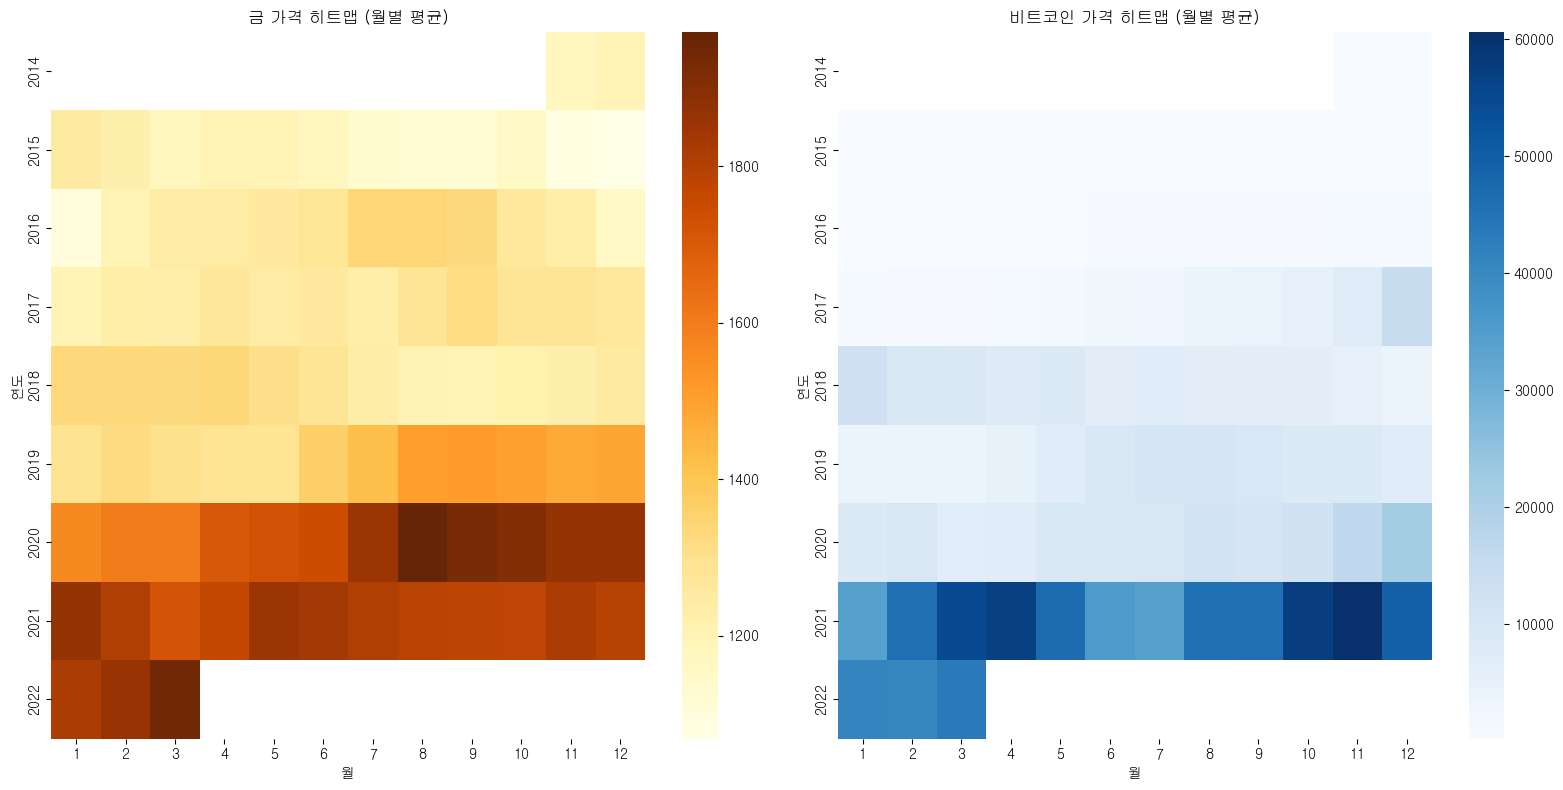

In [151]:
# 월별 평균 계산
gold_common['month'] = gold_common['date'].dt.to_period('M')
btc_common['month'] = btc_common['date'].dt.to_period('M')

# 월별 가격 평균 계산
gold_monthly = gold_common.groupby('month')['price'].mean().reset_index()
btc_monthly = btc_common.groupby('month')['price'].mean().reset_index()

gold_monthly['year'] = gold_monthly['month'].dt.year
gold_monthly['month_num'] = gold_monthly['month'].dt.month

btc_monthly['year'] = btc_monthly['month'].dt.year
btc_monthly['month_num'] = btc_monthly['month'].dt.month

pivot_gold = gold_monthly.pivot(index='year', columns='month_num', values='price')
pivot_btc = btc_monthly.pivot(index='year', columns='month_num', values='price')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.heatmap(pivot_gold, cmap='YlOrBr', ax=axes[0])
axes[0].set_title('금 가격 히트맵 (월별 평균)')
axes[0].set_xlabel('월')
axes[0].set_ylabel('연도')

sns.heatmap(pivot_btc, cmap='Blues', ax=axes[1])
axes[1].set_title('비트코인 가격 히트맵 (월별 평균)')
axes[1].set_xlabel('월')
axes[1].set_ylabel('연도')

plt.tight_layout()
plt.show()

- 경제 위기 (ex. 코로나 팬데믹) 기준으로 가격 안정성 살펴보기

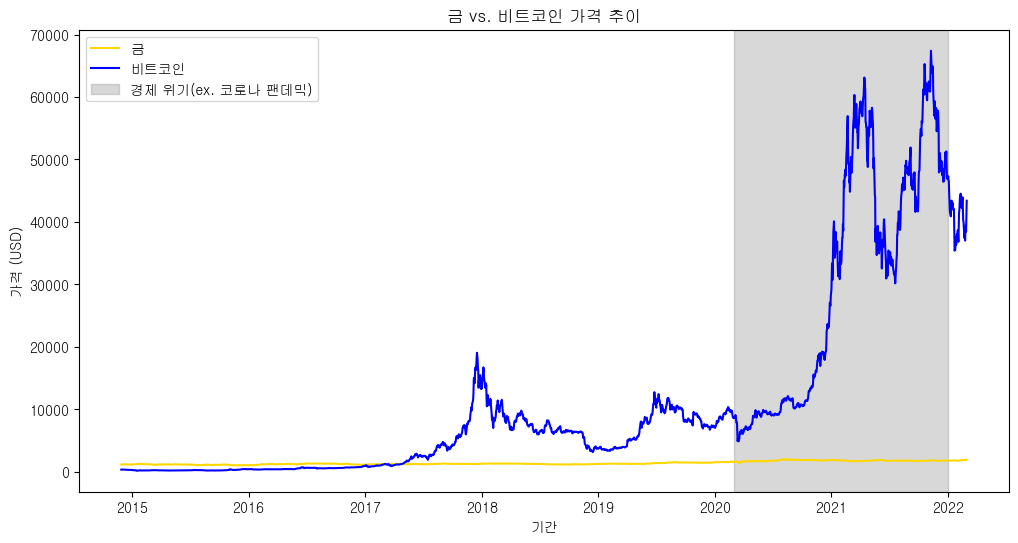

In [144]:
crisis_start = '2020-03-01'
crisis_end = '2022-01-01'

plt.figure(figsize=(12, 6))
plt.plot(gold_common['date'], gold_common['price'], label='금', color='gold')
plt.plot(btc_common['date'], btc_common['price'], label='비트코인', color='blue')
plt.axvspan(crisis_start, crisis_end, color='gray', alpha=0.3, label='경제 위기(ex. 코로나 팬데믹)')
plt.legend()
plt.title('금 vs. 비트코인 가격 추이')
plt.xlabel('기간')
plt.ylabel('가격 (USD)')
plt.show()

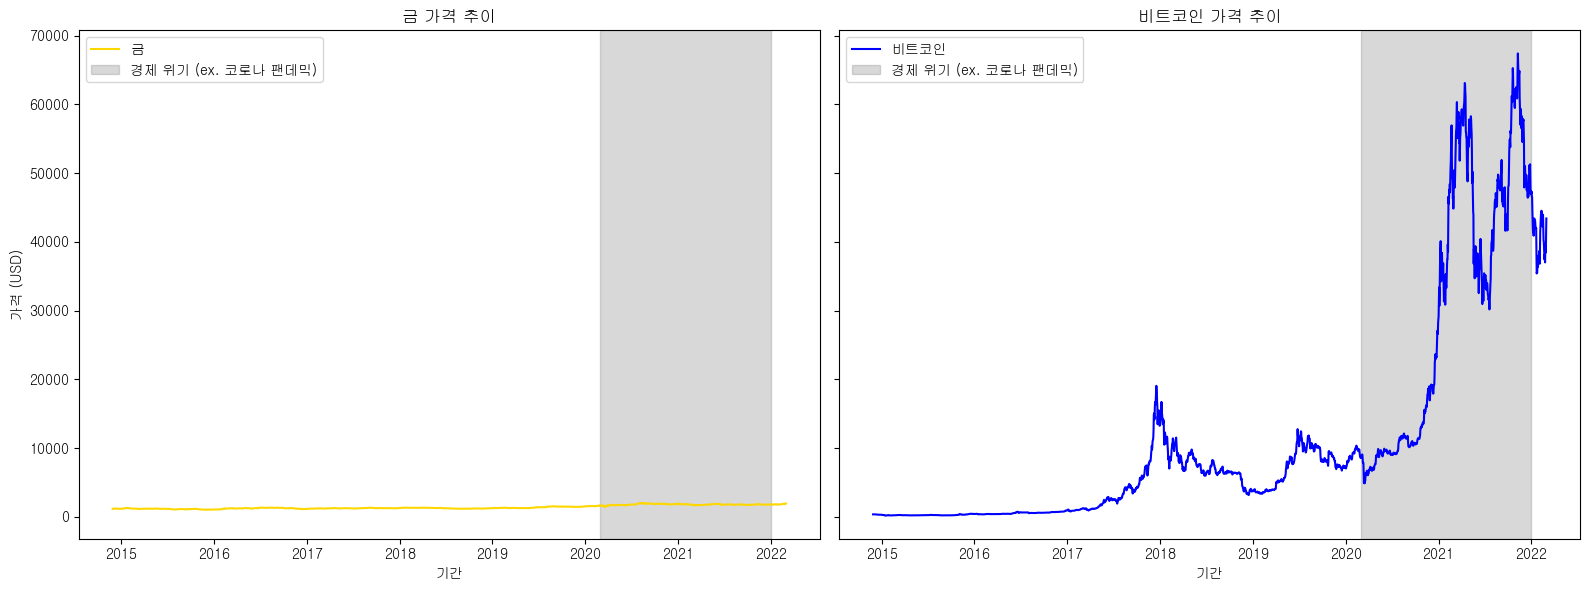

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 금 가격 그래프
axes[0].plot(gold_common['date'], gold_common['price'], label='금', color='gold')
axes[0].axvspan(pd.to_datetime(crisis_start), pd.to_datetime(crisis_end), color='gray', alpha=0.3, label='경제 위기 (ex. 코로나 팬데믹)')
axes[0].set_title('금 가격 추이')
axes[0].set_xlabel('기간')
axes[0].set_ylabel('가격 (USD)')
axes[0].legend()

# 비트코인 가격 그래프
axes[1].plot(btc_common['date'], btc_common['price'], label='비트코인', color='blue')
axes[1].axvspan(pd.to_datetime(crisis_start), pd.to_datetime(crisis_end), color='gray', alpha=0.3, label='경제 위기 (ex. 코로나 팬데믹)')
axes[1].set_title('비트코인 가격 추이')
axes[1].set_xlabel('기간')
axes[1].legend()

plt.tight_layout()
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5188\2061759904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_common['price_normalized'] = normalize_series(gold_common['price'])


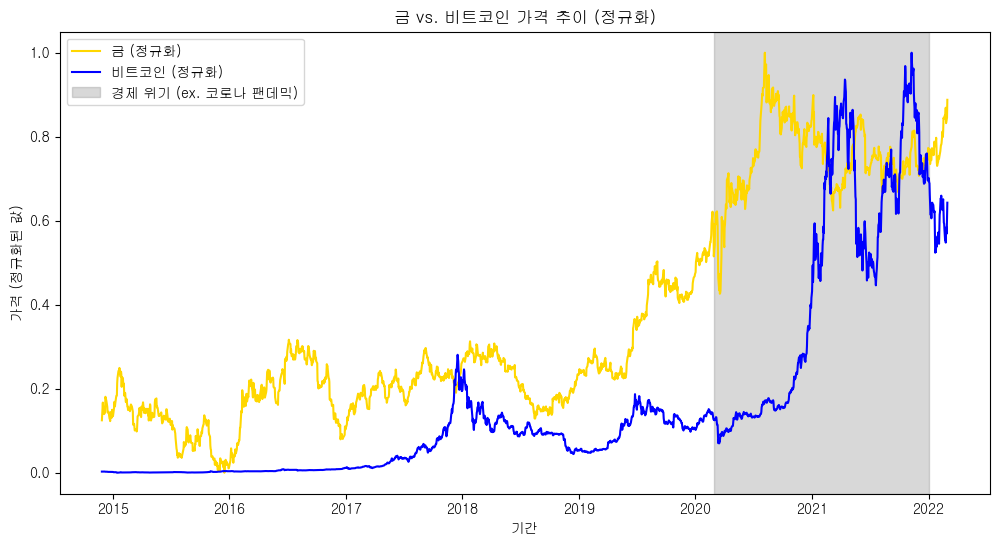

In [145]:
# 금과 비트코인 가격 정규화
gold_common['price_normalized'] = normalize_series(gold_common['price'])
btc_common['price_normalized'] = normalize_series(btc_common['price'])

# 경제 위기 기간 시각화
plt.figure(figsize=(12, 6))
plt.plot(gold_common['date'], gold_common['price_normalized'], label='금 (정규화)', color='gold')
plt.plot(btc_common['date'], btc_common['price_normalized'], label='비트코인 (정규화)', color='blue')
plt.axvspan(pd.to_datetime(crisis_start), pd.to_datetime(crisis_end), color='gray', alpha=0.3, label='경제 위기 (ex. 코로나 팬데믹)')
plt.legend()
plt.title('금 vs. 비트코인 가격 추이 (정규화)')
plt.xlabel('기간')
plt.ylabel('가격 (정규화된 값)')
plt.show()